# Imputation

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        'gender': np.random.binomial(1, .6, 100),
        'height': np.random.normal(0, 10, 100), 
        'noise': np.random.normal(0, 2, 100), 
    }
)

df['height'] = df['height'] + df['gender'].apply(
    lambda g: 150 if g else 180
)
df['height (with 75% NaN)'] = df['height'].apply(
    lambda x: x if np.random.binomial(1, .25, 1)[0] else np.nan
)
df['height (with 10% NaN)'] = df['height'].apply(
    lambda x: x if np.random.binomial(1, .9, 1)[0] else np.nan
)
df['weight'] = df['height'] + df['noise'] - 110 

In [2]:
df.sample(4).reset_index()[
    [
        'height (with 75% NaN)',
        'weight'
    ]
]

,height (with 75% NaN),weight
0,NaN,37.984075
1,NaN,77.889137
2,NaN,37.613015
3,NaN,43.347889


In [3]:
df.sample(n=5)

,gender,height,noise,height (with 75% NaN),height (with 10% NaN),weight
77,0,178.957522,0.848120,NaN,178.957522,69.805642
85,0,167.975121,-1.913076,NaN,167.975121,56.062045
96,1,148.151607,0.106362,148.151607,148.151607,38.257969
27,1,139.640696,-2.956160,NaN,139.640696,26.684536
40,1,148.342997,1.131839,NaN,148.342997,39.474835


In [4]:
df[
    [
        'gender',
        'height (with 75% NaN)',
        'weight',
    ]
].isnull().mean()

gender                   0.00
height (with 75% NaN)    0.77
weight                   0.00
dtype: float64

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


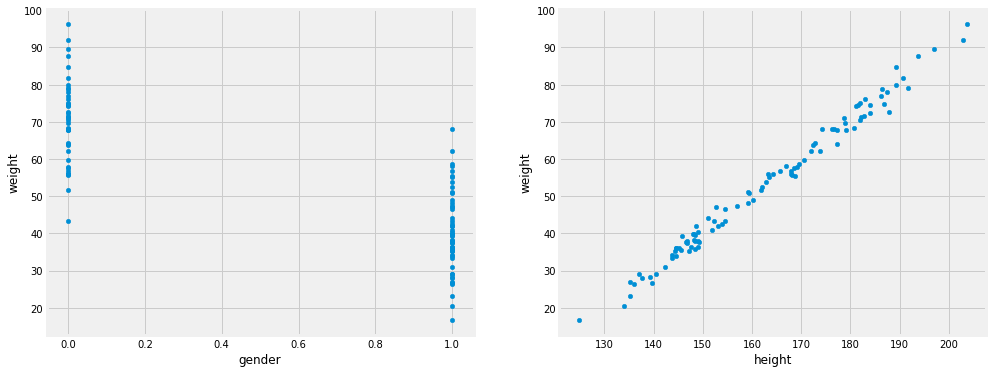

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df.plot(
    kind='scatter',
    x='gender',
    y='weight',
    ax=axs[0]
)

df.plot(
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[1]
)

fig.show()

In [6]:
from sklearn.impute import SimpleImputer

df['height (75% zero imputed)'] = df['height (with 75% NaN)'].fillna(0)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['height (10% mean imputed)'] = imp.fit_transform(df[['height (with 10% NaN)']])[:, 0]
df['height (75% mean imputed)'] = imp.fit_transform(df[['height (with 75% NaN)']])[:, 0]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan)
df['height (75% iterative imputed)'] = imp.fit_transform(df[['height (with 75% NaN)', 'gender']])[:, 0]

In [7]:
from sklearn.impute import MissingIndicator

imp = MissingIndicator(missing_values=np.nan)
df['height (is missing?)'] = imp.fit_transform(df[['height (with 75% NaN)']])[:, 0]

In [110]:
df[
    df['height (75% zero imputed)'] == 0
]['weight'].describe()

count    77.000000
mean     49.981164
std      19.729168
min       8.889002
25%      33.793496
50%      49.760512
75%      65.586753
max      91.593338
Name: weight, dtype: float64

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


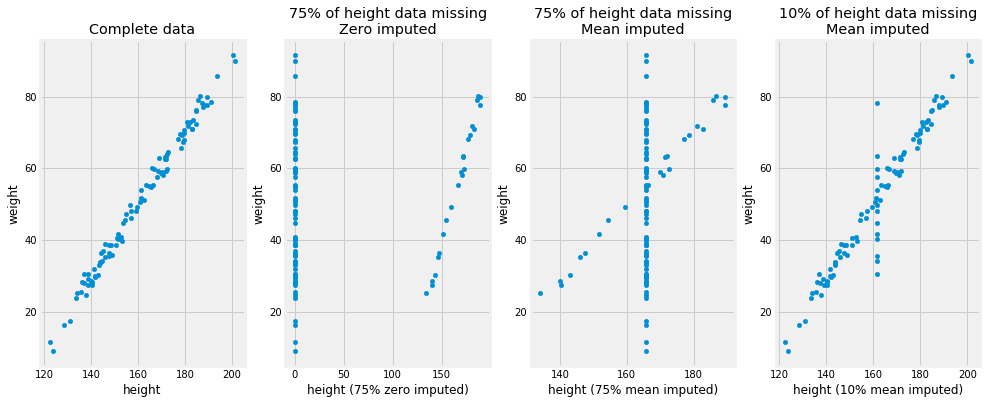

In [91]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    title='75% of height data missing\nZero imputed',
    kind='scatter',
    x='height (75% zero imputed)',
    y='weight',
    ax=axs[1]
)


df.plot(
    title='75% of height data missing\nMean imputed',
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight',
    ax=axs[2]
)

df.plot(
    title='10% of height data missing\nMean imputed',
    kind='scatter',
    x='height (10% mean imputed)',
    y='weight',
    ax=axs[3]
)


fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


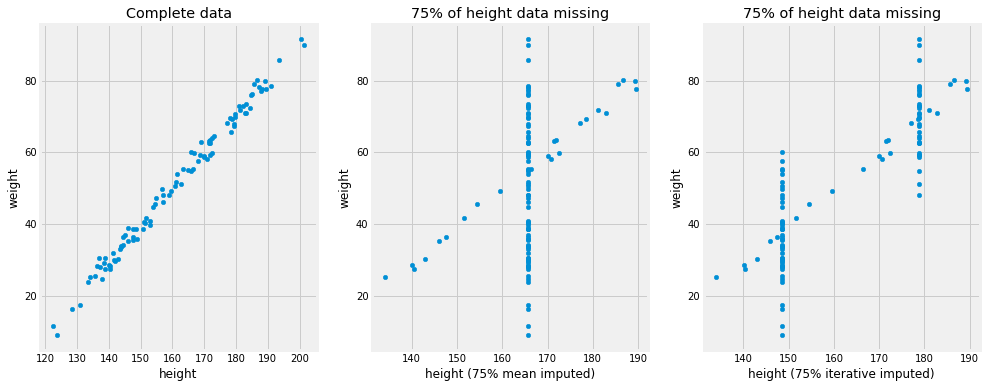

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    title='75% of height data missing',
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight',
    ax=axs[1]
)

df.plot(
    title='75% of height data missing',
    kind='scatter',
    x='height (75% iterative imputed)',
    y='weight',
    ax=axs[2]
)


fig.show()

In [89]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height']], df['weight']
reg.fit(x, y)
print('Original data:', reg.coef_, reg.intercept_)
# print('Original data:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height (75% zero imputed)']], df['weight']
reg.fit(x, y)
print('Zero imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height (75% mean imputed)']], df['weight']
reg.fit(x, y)
print('Mean imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height (75% iterative imputed)',]], df['weight']
reg.fit(x, y)
print('Mean imputed data + indicator:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

Original data: [0.33052878 1.02588647] -114.4278312615912
MSE: 3.38923428355737
Zero imputed data: [-2.29090749e+01  1.83870105e-02] 63.13464366988694
MSE: 133.7481490214107
Mean imputed data: [-20.67293431   0.51202384] -22.213019801368375
MSE: 129.3959978784711
Mean imputed data + indicator: [-0.12058519  1.0660935 ] -121.57227380742268
MSE: 95.50694884905533


In [107]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height']], df['weight']
reg.fit(x, y)
print('Original data:', reg.coef_, reg.intercept_)
# print('Original data:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height (75% zero imputed)']], df['weight']
reg.fit(x, y)
print('Zero imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height (75% mean imputed)']], df['weight']
reg.fit(x, y)
print('Mean imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height (75% iterative imputed)',]], df['weight']
reg.fit(x, y)
print('Mean imputed data + indicator:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

Original data: [1.01878328] -113.10025592888209
MSE: 3.420184648961941
Zero imputed data: [0.04687084] 49.44941244579199
MSE: 364.60918211071635
Mean imputed data: [1.03719967] -120.58013423493921
MSE: 301.7461572190125
Mean imputed data + indicator: [1.07020324] -122.30501674003975
MSE: 95.50924020632084


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


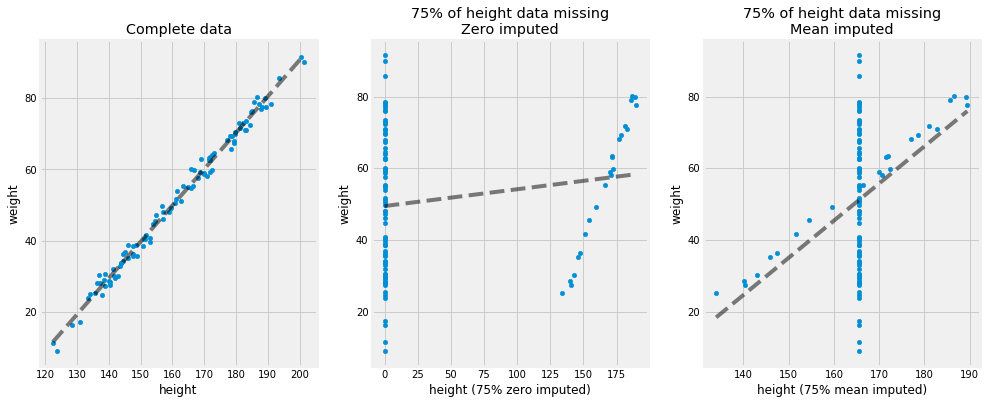

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

x, y = df[['height']], df['weight']
reg = Ridge()
reg.fit(x, y)
axs[0].plot(
    [
        df['height'].min(),
        df['height'].max()
    ], 
    [
        reg.intercept_ + reg.coef_[0] * df['height'].min(),
        reg.intercept_ + reg.coef_[0] * df['height'].max()
    ], 
    'k--',
    alpha=0.5,
)

df.plot(
    title='75% of height data missing\nZero imputed',
    kind='scatter',
    x='height (75% zero imputed)',
    y='weight',
    ax=axs[1]
)
x, y = df[['height (75% zero imputed)']], df['weight']
reg = Ridge()
reg.fit(x, y)
axs[1].plot(
    [
        df['height (75% zero imputed)'].min(),
        df['height (75% zero imputed)'].max()
    ], 
    [
        reg.intercept_ + reg.coef_[0] * df['height (75% zero imputed)'].min(),
        reg.intercept_ + reg.coef_[0] * df['height (75% zero imputed)'].max()
    ], 
    'k--',
    alpha=0.5,
)


df.plot(
    title='75% of height data missing\nMean imputed',
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight',
    ax=axs[2]
)
x, y = df[['height (75% mean imputed)']], df['weight']
reg = Ridge()
reg.fit(x, y)
axs[2].plot(
    [
        df['height (75% mean imputed)'].min(),
        df['height (75% mean imputed)'].max()
    ], 
    [
        reg.intercept_ + reg.coef_[0] * df['height (75% mean imputed)'].min(),
        reg.intercept_ + reg.coef_[0] * df['height (75% mean imputed)'].max()
    ], 
    'k--',
    alpha=0.5,
)


fig.show()

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['height (10% mean imputed)'] = imp.fit_transform(
    df[['height (with 10% NaN)']]
)[:, 0]